In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
plt.style.use('ggplot')

In [11]:
df = pd.read_csv("Reviews.csv")

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [14]:
df.shape

(568454, 10)

Quick EDA

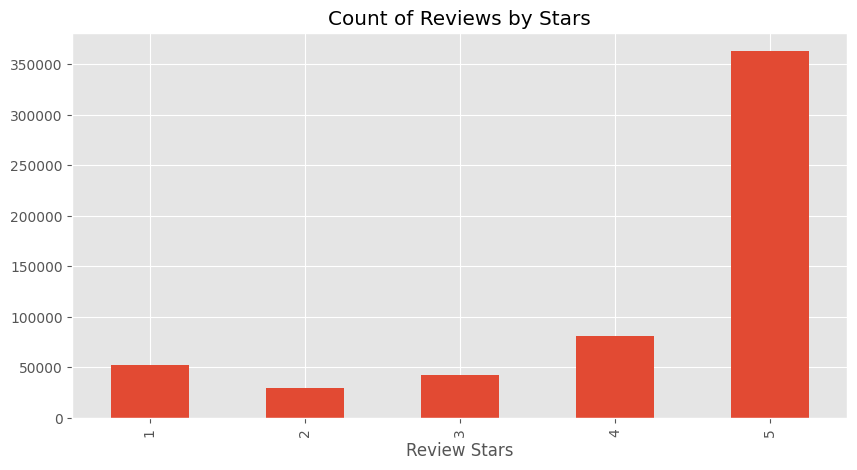

In [15]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [16]:
example=df["Text"][50]

In [17]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [18]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [19]:
entities=nltk.ne_chunk(tagged)
entities.pprint

<bound method Tree.pprint of Tree('S', [('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it', 'PRP'), ('.', '.'), Tree('ORGANIZATION', [('Quaker', 'NNP'), ('Oats', 'NNPS')]), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')])>

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from tqdm import tqdm

sia=SentimentIntensityAnalyzer()

In [21]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [22]:
sia.polarity_scores('This is the worst ever.')

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [23]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [24]:
res ={}
for i , row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)
    

100%|█████████████████████████████████████████████████████████████████████████| 568454/568454 [22:51<00:00, 414.33it/s]


In [25]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders= vaders.merge(df,how='left')

In [26]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


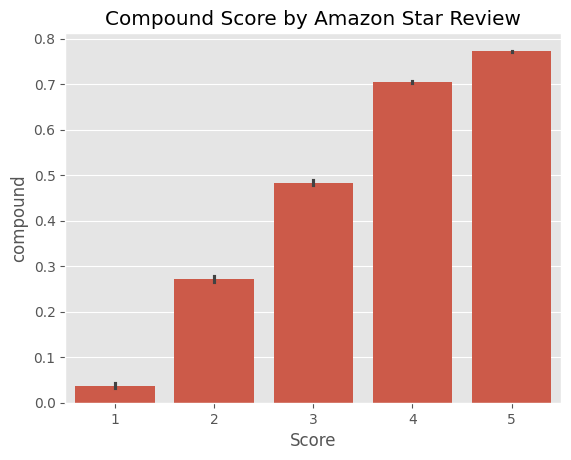

In [27]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

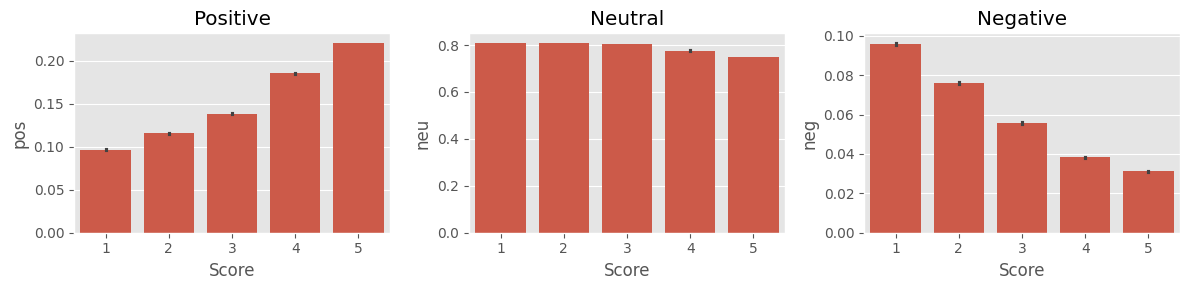

In [28]:
fig ,axs= plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [29]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax


In [30]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [31]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [33]:
encoded_text=tokenizer(example,return_tensors='pt') # pytorch tensor
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687465), 'roberta_pos': np.float32(0.0029573692)}


In [37]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt') # pytorch tensor
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
    }
    return scores_dict

In [38]:
res1 = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row['Text']
        myid = row ['Id']
        vader_result= sia.polarity_scores(text)
        vader_result_rename ={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"] =value
        roberta_result= polarity_scores_roberta(text)
        both = {**vader_result_rename,**roberta_result}
        res[myid]=both
    except RuntimeError:
        print(f"Broke for id {myid}")

  0%|                                                                           | 82/568454 [00:27<38:48:46,  4.07it/s]

Broke for id 83


  0%|                                                                          | 186/568454 [01:01<47:22:43,  3.33it/s]

Broke for id 187


  0%|                                                                          | 528/568454 [03:01<75:54:07,  2.08it/s]

Broke for id 529


  0%|                                                                          | 539/568454 [03:04<44:06:07,  3.58it/s]

Broke for id 540


  0%|                                                                          | 745/568454 [03:45<53:36:33,  2.94it/s]

Broke for id 746


  0%|                                                                          | 865/568454 [04:04<16:50:34,  9.36it/s]

Broke for id 863


  0%|▏                                                                        | 1052/568454 [04:32<23:02:14,  6.84it/s]

Broke for id 1053


  0%|▏                                                                        | 1071/568454 [04:35<17:12:04,  9.16it/s]

Broke for id 1070


  0%|▏                                                                        | 1157/568454 [04:50<15:35:02, 10.11it/s]

Broke for id 1156


  0%|▏                                                                        | 1320/568454 [05:16<28:58:36,  5.44it/s]

Broke for id 1321


  0%|▏                                                                        | 1374/568454 [05:24<43:41:25,  3.61it/s]

Broke for id 1375


  0%|▏                                                                        | 1498/568454 [05:47<15:38:57, 10.06it/s]

Broke for id 1498


  0%|▏                                                                        | 1574/568454 [06:00<41:38:11,  3.78it/s]

Broke for id 1575


  0%|▏                                                                        | 1796/568454 [06:37<14:20:57, 10.97it/s]

Broke for id 1796


  0%|▏                                                                        | 1826/568454 [06:42<24:42:56,  6.37it/s]

Broke for id 1826


  0%|▎                                                                        | 2168/568454 [07:57<30:18:38,  5.19it/s]

Broke for id 2169


  0%|▎                                                                        | 2247/568454 [08:12<25:47:00,  6.10it/s]

Broke for id 2248


  0%|▎                                                                        | 2475/568454 [09:01<31:34:19,  4.98it/s]

Broke for id 2476


  0%|▎                                                                        | 2493/568454 [09:07<24:57:35,  6.30it/s]

Broke for id 2492


  0%|▎                                                                        | 2585/568454 [09:26<21:34:29,  7.29it/s]

Broke for id 2584


  0%|▎                                                                        | 2609/568454 [09:31<48:06:27,  3.27it/s]

Broke for id 2610


  1%|▎                                                                        | 2899/568454 [10:33<22:36:05,  6.95it/s]

Broke for id 2897
Broke for id 2898


  1%|▎                                                                        | 2901/568454 [10:33<21:05:38,  7.45it/s]

Broke for id 2902


  1%|▍                                                                        | 2929/568454 [10:40<32:30:41,  4.83it/s]

Broke for id 2928


  1%|▍                                                                        | 2943/568454 [10:43<31:15:41,  5.02it/s]

Broke for id 2942
Broke for id 2944


  1%|▍                                                                        | 2946/568454 [10:43<28:47:24,  5.46it/s]

Broke for id 2947
Broke for id 2948


  1%|▍                                                                        | 3021/568454 [11:01<32:38:04,  4.81it/s]

Broke for id 3022
Broke for id 3023


  1%|▍                                                                        | 3024/568454 [11:01<22:11:20,  7.08it/s]

Broke for id 3025


  1%|▍                                                                        | 3305/568454 [11:52<20:51:11,  7.53it/s]

Broke for id 3306


  1%|▍                                                                        | 3787/568454 [13:23<27:58:29,  5.61it/s]

Broke for id 3788


  1%|▌                                                                        | 3968/568454 [13:54<22:31:23,  6.96it/s]

Broke for id 3969


  1%|▌                                                                        | 4108/568454 [14:28<22:01:42,  7.12it/s]

Broke for id 4107


  1%|▌                                                                        | 4109/568454 [14:28<23:57:21,  6.54it/s]

Broke for id 4110


  1%|▌                                                                        | 4306/568454 [15:07<37:34:26,  4.17it/s]

Broke for id 4307


  1%|▌                                                                        | 4317/568454 [15:09<31:52:17,  4.92it/s]

Broke for id 4316


  1%|▌                                                                        | 4409/568454 [15:26<21:43:19,  7.21it/s]

Broke for id 4408


  1%|▌                                                                        | 4484/568454 [15:40<20:06:27,  7.79it/s]

Broke for id 4483


  1%|▌                                                                        | 4511/568454 [15:47<31:09:22,  5.03it/s]

Broke for id 4512


  1%|▌                                                                        | 4552/568454 [15:57<37:11:04,  4.21it/s]

Broke for id 4553


  1%|▌                                                                        | 4582/568454 [16:08<66:47:59,  2.34it/s]

Broke for id 4583


  1%|▋                                                                        | 5039/568454 [17:59<42:41:23,  3.67it/s]

Broke for id 5040


  1%|▋                                                                        | 5180/568454 [18:32<26:16:08,  5.96it/s]

Broke for id 5182


  1%|▋                                                                        | 5193/568454 [18:35<31:01:46,  5.04it/s]

Broke for id 5192


  1%|▋                                                                        | 5364/568454 [19:12<37:58:05,  4.12it/s]

Broke for id 5365


  1%|▋                                                                        | 5441/568454 [19:31<34:13:12,  4.57it/s]

Broke for id 5442


  1%|▋                                                                        | 5708/568454 [20:35<36:18:31,  4.31it/s]

Broke for id 5709


  1%|▊                                                                        | 5997/568454 [21:47<32:36:25,  4.79it/s]

Broke for id 5998


  1%|▊                                                                        | 6002/568454 [21:48<55:06:04,  2.84it/s]

Broke for id 6003


  1%|▊                                                                        | 6006/568454 [21:49<57:32:49,  2.71it/s]

Broke for id 6007


  1%|▊                                                                        | 6107/568454 [22:13<26:31:02,  5.89it/s]

Broke for id 6106


  1%|▊                                                                        | 6235/568454 [22:43<37:10:14,  4.20it/s]

Broke for id 6234


  1%|▊                                                                        | 6559/568454 [23:57<27:07:48,  5.75it/s]

Broke for id 6558


  1%|▊                                                                        | 6650/568454 [24:17<60:37:55,  2.57it/s]

Broke for id 6651


  1%|▊                                                                        | 6799/568454 [25:04<37:03:25,  4.21it/s]

Broke for id 6798


  1%|▉                                                                        | 6837/568454 [25:16<56:04:42,  2.78it/s]

Broke for id 6838


  1%|▉                                                                        | 6849/568454 [25:19<62:16:18,  2.51it/s]

Broke for id 6850


  1%|▉                                                                        | 6887/568454 [25:29<22:04:17,  7.07it/s]

Broke for id 6886


  1%|▉                                                                        | 6906/568454 [25:34<38:18:29,  4.07it/s]

Broke for id 6905


  1%|▉                                                                        | 6954/568454 [25:50<38:52:27,  4.01it/s]

Broke for id 6955


  1%|▉                                                                        | 7076/568454 [26:21<54:18:24,  2.87it/s]

Broke for id 7077


  1%|▉                                                                        | 7087/568454 [26:24<40:33:45,  3.84it/s]

Broke for id 7088


  1%|▉                                                                        | 7200/568454 [26:56<34:55:56,  4.46it/s]

Broke for id 7201


  1%|▉                                                                        | 7605/568454 [28:30<28:44:48,  5.42it/s]

Broke for id 7604


  1%|▉                                                                        | 7607/568454 [28:30<33:23:20,  4.67it/s]

Broke for id 7608


  1%|▉                                                                        | 7672/568454 [28:42<18:25:21,  8.46it/s]

Broke for id 7671


  1%|▉                                                                        | 7700/568454 [28:50<42:01:44,  3.71it/s]

Broke for id 7701


  1%|█                                                                        | 7811/568454 [29:12<21:44:54,  7.16it/s]

Broke for id 7810


  1%|█                                                                        | 7908/568454 [29:29<31:00:35,  5.02it/s]

Broke for id 7907


  1%|█                                                                        | 8076/568454 [30:04<21:52:21,  7.12it/s]

Broke for id 8077


  1%|█                                                                        | 8132/568454 [30:12<20:17:04,  7.67it/s]

Broke for id 8131


  1%|█                                                                        | 8267/568454 [30:38<26:12:38,  5.94it/s]

Broke for id 8266


  2%|█                                                                        | 8739/568454 [32:00<34:20:05,  4.53it/s]

Broke for id 8740


  2%|█                                                                        | 8757/568454 [32:03<20:26:17,  7.61it/s]

Broke for id 8757


  2%|█▏                                                                       | 8936/568454 [32:36<14:30:55, 10.71it/s]

Broke for id 8935


  2%|█▏                                                                       | 9591/568454 [34:23<27:08:58,  5.72it/s]

Broke for id 9590


  2%|█▎                                                                       | 9851/568454 [35:16<31:37:20,  4.91it/s]

Broke for id 9850


  2%|█▎                                                                       | 9880/568454 [35:20<28:35:53,  5.43it/s]

Broke for id 9881


  2%|█▎                                                                       | 9911/568454 [35:27<32:43:25,  4.74it/s]

Broke for id 9910


  2%|█▎                                                                       | 9924/568454 [35:30<28:30:08,  5.44it/s]

Broke for id 9923


  2%|█▎                                                                      | 10001/568454 [35:45<38:42:45,  4.01it/s]

Broke for id 10002


  2%|█▎                                                                      | 10004/568454 [35:46<33:16:41,  4.66it/s]

Broke for id 10005


  2%|█▎                                                                      | 10030/568454 [35:50<23:28:44,  6.61it/s]

Broke for id 10031


  2%|█▎                                                                      | 10549/568454 [37:19<31:37:49,  4.90it/s]

Broke for id 10550


  2%|█▎                                                                      | 10836/568454 [38:10<28:47:33,  5.38it/s]

Broke for id 10837


  2%|█▍                                                                      | 10865/568454 [38:15<14:20:56, 10.79it/s]

Broke for id 10861
Broke for id 10862
Broke for id 10863
Broke for id 10864


  2%|█▍                                                                      | 10887/568454 [38:18<15:53:33,  9.75it/s]

Broke for id 10885


  2%|█▍                                                                      | 10923/568454 [38:24<19:41:21,  7.87it/s]

Broke for id 10924


  2%|█▍                                                                      | 10947/568454 [38:28<18:02:58,  8.58it/s]

Broke for id 10946


  2%|█▍                                                                      | 10968/568454 [38:33<34:08:12,  4.54it/s]

Broke for id 10969


  2%|█▍                                                                      | 11115/568454 [38:58<19:00:08,  8.15it/s]

Broke for id 11114


  2%|█▍                                                                      | 11241/568454 [39:22<11:24:31, 13.57it/s]

Broke for id 11238
Broke for id 11239


  2%|█▍                                                                      | 11245/568454 [39:22<14:41:56, 10.53it/s]

Broke for id 11245


  2%|█▍                                                                      | 11303/568454 [39:30<14:35:52, 10.60it/s]

Broke for id 11302


  2%|█▍                                                                      | 11375/568454 [39:42<32:25:01,  4.77it/s]


IndexError: index out of range in self

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

In [ ]:
sns.pairplot(data=results_df,vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],hue='Score',palette='tab10')
plt.show()

In [ ]:
results_df.query('Score == 1').sort_values('roberta_pos',ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1').sort_values('vader_pos',ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

In [ ]:
sent_pipeline('I love sentiment analysis!')

In [ ]:
sent_pipeline('Make sure to like and subscribe!')

In [ ]:
sent_pipeline('booo')